In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import brown

In [4]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [5]:

import nltk
sentence='hello,world'

token=nltk.word_tokenize(sentence)


In [6]:
token

['hello', ',', 'world']

In [7]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

In [2]:
df_train=pd.read_csv('train.csv',encoding='ISO-8859-1')
df_test=pd.read_csv('test.csv',encoding='ISO-8859-1')

In [3]:
df_desc=pd.read_csv('product_descriptions.csv')

In [4]:
df_train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [5]:
df_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [6]:
df_all=pd.concat((df_train,df_test),axis=0,ignore_index=True)

In [7]:
df_all.head()

,id,product_title,product_uid,relevance,search_term
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet


In [ ]:
df_all.shape
df_train.shape

In [9]:
df_all=pd.merge(df_all,df_desc,how='left',on='product_uid')

In [10]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ..."
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ..."
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...


In [11]:
stemmer=SnowballStemmer('english')
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [12]:
def str_common_word(str1,str2):
    return sum(int(str2,find(word)>=0)for word in str1.split(0))

In [13]:
df_all['search_term']=df_all['search_term'].map(lambda x:str_stemmer(x))
df_all['product_title']=df_all['product_title'].map(lambda x:str_stemmer(x))
df_all['product_description']=df_all['product_description'].map(lambda x:str_stemmer(x))


In [15]:
df_all['len_of_query']=df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)
df_all['common_in_title']=df_all.apply(lambda x:str_common_word(x['search_term'],x['product_title']),axis=1)
df_all['common_in_desc']=df_all.apply(lambda x:str_common_word(x['search_term'],x['product_title']),axis=1)
df_all=df_all.drop(['search_term','product_title','product_description'],axis=1)
df_train=df_all.loc[df_train.index]
df_test=df_all.loc[df_test.index]
test_ids=df_test['id']
y_train=df_train['relevance'].values
X_train=df_train.drop(['id','relevance'],axis=1).values
X_test=df_test_drop(['id','relevance'],axis=1).values

TypeError: ('must be str or None, not int', 'occurred at index 0')

In [ ]:
from sklearn.ensemble import RandomForestRegressior
from sklearn.model_selection import cross_val_score
params=[1,3,5,6,7,8,9,10]
test_scores=[]
for param in params:
    clf=RandomForestRegressor(n_estimators=30,max_depth=param)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params,test_scores)
plt.title('Params vs error')

NameError: name 'params' is not defined

In [2]:
import numpy as np
la=np.linalg
words=['I','like','enjoy','deep','learning','NLP','flying']
X=np.array([[0,2,1,0,0,0,0,0],
           [2,0,0,1,0,1,0,0],
           [1,0,0,0,0,0,1,0],
           [0,1,0,0,1,0,0,0],
           [0,0,0,1,0,0,0,1],
           [0,1,0,0,0,0,0,1],
           [0,0,1,0,0,0,0,1],
           [0,0,0,0,1,1,1,0]])
U,s,Vh=la.svd(X,full_matrices=False)

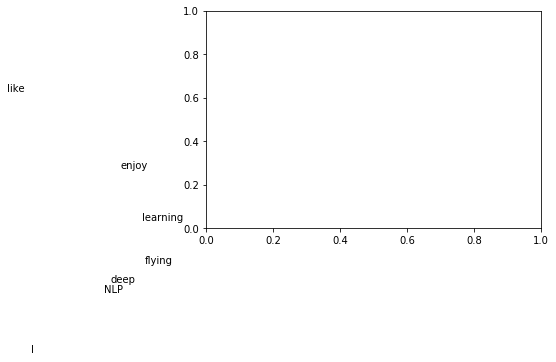

In [5]:
import matplotlib.pyplot as plt
for i in range(len(words)):
    plt.text(U[i,0],U[i,1],words[i])